# What Does this code do?
1) Import INDU return data (dow jones indstrial in all of its many forms)
2) Convert date strings to datetime, and only keep dates greater than Jan 1 1975.
3) Calculate "trend" components (assuming quarterly seasonality), add these features to the dataframe.
4) Take 1st and 2nd derivatives of trend components to get velocity and acceleration features.
5) Only include quarterly data (last day of each month)
5) Export cleaned data to csv to use in master dataframes later.

In [1]:
# Most if not all imports
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.tsa.api as tsa # Use this for exponential smoothing.
from datetime import datetime

In [2]:
# Start with indu data. This data is sorted in chronological order.
# Try to create 'DATE' and 'RETURN' headers after the fact.
indu_raw = pd.read_csv(r"C:\Users\Edmund\OMSA\MGT6203\group project\Team36_group_project\Data\INDU RETURN.csv", header = None,
                        names=["DATE", "RETURN"])
#display(indu_raw.head())
#print(type(indu_raw['DATE'].iloc[4]))
# get index where 'DATE' == '1/1/1975'
indu_min_idx = (indu_raw.index[indu_raw['DATE'] == '1/2/75'].to_list())[0]
# print(indu_min_idx)
indu_cut = indu_raw[indu_min_idx:] # only include data from 1975 onward
indu_cut['RETURN'] = indu_cut['RETURN'] / 100.0  # Divide by 100 to go from % return to decimal return.
display(indu_cut.head(12))
display(indu_cut.tail(12))

C:\Users\Edmund\AppData\Local\Temp\ipykernel_3944\1656558366.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indu_cut['RETURN'] = indu_cut['RETURN'] / 100.0  # Divide by 100 to go from % return to decimal return.


,DATE,RETURN
15109,1/2/75,0.025639
15110,1/3/75,0.003955
15111,1/6/75,0.004192
15112,1/7/75,0.006262
15113,1/8/75,-0.009030
15114,1/9/75,0.015518
15115,1/10/75,0.020968
15116,1/13/75,-0.006998
15117,1/14/75,-0.008377
15118,1/15/75,0.007230


,DATE,RETURN
27397,9/14/23,0.009817
27398,9/15/23,-0.008275
27399,9/18/23,0.000175
27400,9/19/23,-0.003078
27401,9/20/23,-0.002226
27402,9/21/23,-0.010756
27403,9/22/23,-0.003128
27404,9/25/23,0.001267
27405,9/26/23,-0.011409
27406,9/27/23,-0.002041


C:\Users\Edmund\AppData\Local\Temp\ipykernel_3944\1338294929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indu_cut['DATE'] = pd.to_datetime(indu_cut['DATE'], format='%m/%d/%y')
C:\Users\Edmund\AppData\Local\Temp\ipykernel_3944\1338294929.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indu_cut['RETURN'] = pd.to_numeric(indu_cut['RETURN'])


<AxesSubplot:xlabel='DATE'>

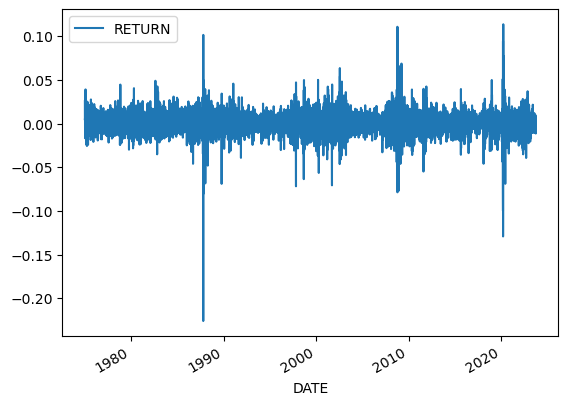

In [3]:
# now let's convert the 'DATE' column to datetime
indu_cut['DATE'] = pd.to_datetime(indu_cut['DATE'], format='%m/%d/%y')
# print(type(indu_cut['DATE'].iloc[4]))
# display(indu_cut.head())
# display(indu_cut.tail())
# print(indu_cut['DATE'].dtype)
# print(indu_cut['RETURN'].dtype)
# try converting return to float, see how that goes.
indu_cut['RETURN'] = pd.to_numeric(indu_cut['RETURN'])
indu_cut.plot(x = 'DATE', y = 'RETURN')

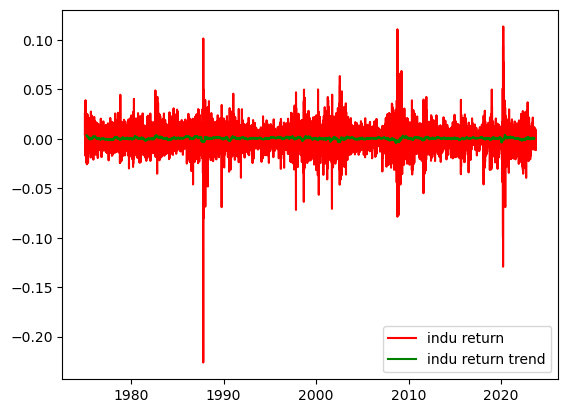

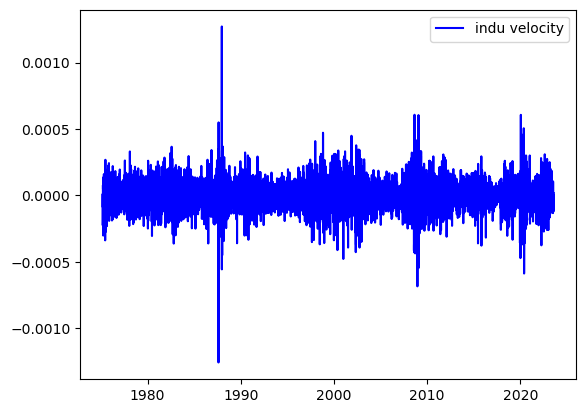

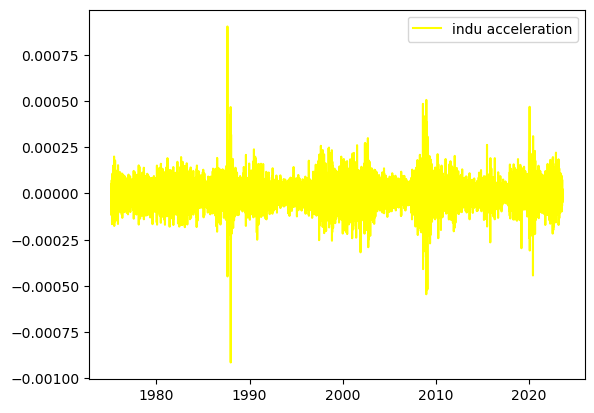

In [4]:
# Ok. now that we have the date ranges and type that we want, it's time to get the trend components and the velocity and acceleration:
# indu data is roughly daily so I'll assume 90 day (quarterly) seasonality.
indu_cut = indu_cut.rename(columns={'RETURN': 'indu return'})
indu_ts = tsa.seasonal_decompose(indu_cut['indu return'], model='additive', filt=None, period=90, two_sided=True, extrapolate_trend=0)
indu_cut['indu return trend'] = indu_ts.trend

# plt.plot(indu_cut['DATE'].iloc[0:400], indu_cut['indu return'].iloc[0:400], color = 'red', label = "indu return")
# plt.plot(indu_cut['DATE'].iloc[0:400], indu_cut['indu return trend'].iloc[0:400], color = 'green', label = "indu return trend")
plt.plot(indu_cut['DATE'], indu_cut['indu return'], color = 'red', label = "indu return")
plt.plot(indu_cut['DATE'], indu_cut['indu return trend'], color = 'green', label = "indu return trend")
plt.legend()
plt.show()

# now let's generate velocity and acceleration features based on the exponentially smoothed data:

indu_cut['indu velocity'] = np.gradient(indu_cut['indu return trend'])
indu_cut['indu acceleration'] = np.gradient(indu_cut['indu velocity'])

plt.plot(indu_cut['DATE'], indu_cut['indu velocity'], color = 'blue', label = 'indu velocity')
plt.legend()
plt.show()

plt.plot(indu_cut['DATE'], indu_cut['indu acceleration'], color = 'yellow', label = 'indu acceleration')
plt.legend()
plt.show()

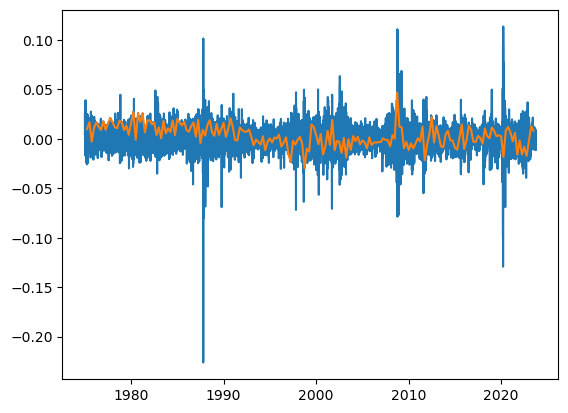

hellow


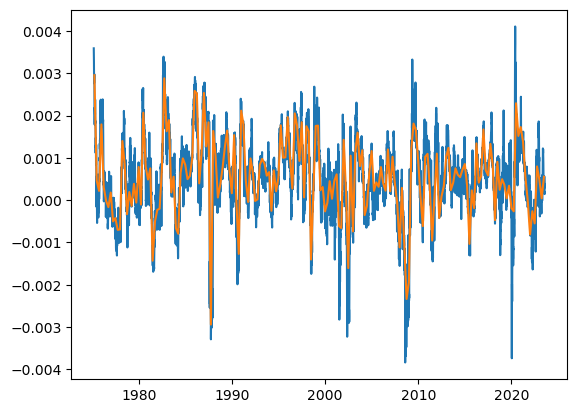

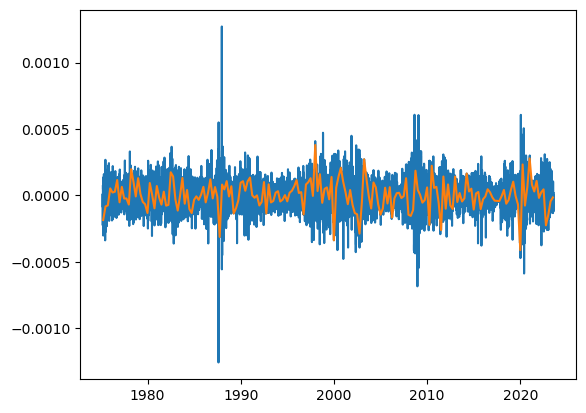

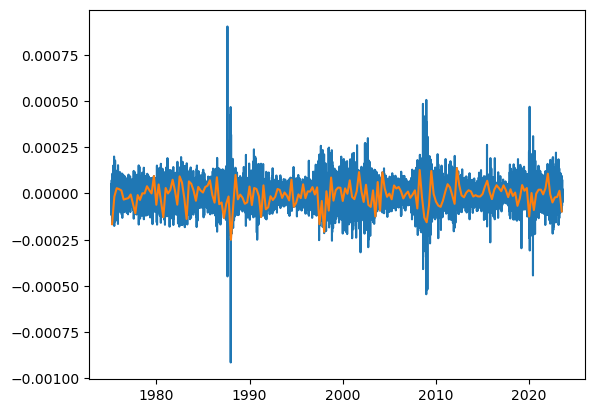

In [5]:
# # Now we need to see what is included/excluded when we only look at the quarterly numbers.
# # Let's play with quarterly sampling
# #print(indu_cut['DATE'].iloc[-1])
# display(indu_cut.head())
# # get the period for each, make it a column.
indu_cut["Quarter"] = pd.PeriodIndex(indu_cut["DATE"], freq="Q")

# This groupby statement worked like a charm:
# https://stackoverflow.com/questions/53842287/select-rows-with-highest-value-from-groupby  
indu_Q = indu_cut.loc[indu_cut.groupby('Quarter')['DATE'].idxmax()]
indu_Q = indu_Q.dropna()
indu_Q

# now lets plot the points with the original and trend data to see what it looks like:
# indu_Q.plot(x="DATE", y=["indu return", "indu return trend"])
plt.plot(indu_cut['DATE'], indu_cut['indu return'])
plt.plot(indu_Q['DATE'], indu_Q['indu return'])
plt.show()

print('hellow')

plt.plot(indu_cut['DATE'], indu_cut['indu return trend'])
plt.plot(indu_Q['DATE'], indu_Q['indu return trend'])
# plt.xlim(indu_Q['DATE'].iloc[0], indu_Q['DATE'].iloc[300])
plt.show()

plt.plot(indu_cut['DATE'], indu_cut['indu velocity'])
plt.plot(indu_Q['DATE'], indu_Q['indu velocity'])
plt.show()

plt.plot(indu_cut['DATE'], indu_cut['indu acceleration'])
plt.plot(indu_Q['DATE'], indu_Q['indu acceleration'])
plt.show()

# try groupby period, then date, then take max and see what comes out of it.
#per = pd.period_range(start=indu_cut['DATE'].iloc[0], end=indu_cut['DATE'].iloc[-1], freq='Q')
# for each period get max date
#display(per)

In [6]:
# We seem to be losing information by going quarterly. Monthly might be better, but let's give it a try. 
# From here I'm going to remove the 'PRICE' column, then export to csv:
display(indu_Q.head())
print(list(indu_Q.columns))
# indu_out = indu_Q.drop(['PRICE '], axis=1) # drop the price column because we will just be looking at returns
display(indu_Q.head())

# Export to csv then merge with other dataframes that the team comes up with.
now = datetime.now()
date_str = str(now.year) + str(now.month) + str(now.day) + str(now.hour) + str(now.minute) + str(now.second)
# #print(date_str)
output_dir = r"C:\\Users\\Edmund\\OMSA\\MGT6203\\group project\Team36_group_project\Data\\"
output_fname = output_dir + "clean_INDU_data"  + date_str + '.csv'
indu_Q.to_csv(output_fname, index=False)

,DATE,indu return,indu return trend,indu velocity,indu acceleration,Quarter
15170,1975-03-31,0.009997,0.002954,-0.000185,-0.000166,1975Q1
15234,1975-06-30,0.016997,0.000461,-0.000083,-0.000017,1975Q2
15299,1975-09-30,-0.002856,0.000219,-0.000075,0.000029,1975Q3
15363,1975-12-31,0.011297,0.001791,0.000053,0.000024,1975Q4
15426,1976-03-31,0.016681,0.000308,0.000022,0.000017,1976Q1


['DATE', 'indu return', 'indu return trend', 'indu velocity', 'indu acceleration', 'Quarter']


,DATE,indu return,indu return trend,indu velocity,indu acceleration,Quarter
15170,1975-03-31,0.009997,0.002954,-0.000185,-0.000166,1975Q1
15234,1975-06-30,0.016997,0.000461,-0.000083,-0.000017,1975Q2
15299,1975-09-30,-0.002856,0.000219,-0.000075,0.000029,1975Q3
15363,1975-12-31,0.011297,0.001791,0.000053,0.000024,1975Q4
15426,1976-03-31,0.016681,0.000308,0.000022,0.000017,1976Q1
